<img src="Tarjeta.png">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Conectemonos-a-Google-Drive-y-preparemos-los-datos" data-toc-modified-id="1.-Conectemonos-a-Google-Drive-y-preparemos-los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Conectemonos a Google Drive y preparemos los datos</a></span></li><li><span><a href="#2.-Librerias" data-toc-modified-id="2.-Librerias-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Librerias</a></span></li><li><span><a href="#3.-Definimos-algunas-constantes" data-toc-modified-id="3.-Definimos-algunas-constantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Definimos algunas constantes</a></span></li><li><span><a href="#4.-Preparamos-los-datos-de-entrenamiento" data-toc-modified-id="4.-Preparamos-los-datos-de-entrenamiento-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Preparamos los datos de entrenamiento</a></span></li><li><span><a href="#5.-Exploremos-los-datos" data-toc-modified-id="5.-Exploremos-los-datos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. Exploremos los datos</a></span></li><li><span><a href="#6.-Pintemos-una-imagen" data-toc-modified-id="6.-Pintemos-una-imagen-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6. Pintemos una imagen</a></span></li><li><span><a href="#7.-Apilemos-bloques-para-hacer-el-modelo" data-toc-modified-id="7.-Apilemos-bloques-para-hacer-el-modelo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>7. Apilemos bloques para hacer el modelo</a></span><ul class="toc-item"><li><span><a href="#7.1-Montemos-nuestro-feature-extractor-don-VGG16" data-toc-modified-id="7.1-Montemos-nuestro-feature-extractor-don-VGG16-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>7.1 Montemos nuestro feature extractor don VGG16</a></span></li><li><span><a href="#7.4-Pre-procesado-de-las-imagenes-para-llevarlas-al-cuello-de-botella" data-toc-modified-id="7.4-Pre-procesado-de-las-imagenes-para-llevarlas-al-cuello-de-botella-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>7.4 Pre-procesado de las imagenes para llevarlas al cuello de botella</a></span></li><li><span><a href="#7.5-Montamos-la-red-de-classificación" data-toc-modified-id="7.5-Montamos-la-red-de-classificación-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>7.5 Montamos la red de classificación</a></span></li></ul></li><li><span><a href="#8.-Montemos-el-optimizador-compilando-el-modelo" data-toc-modified-id="8.-Montemos-el-optimizador-compilando-el-modelo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>8. Montemos el optimizador compilando el modelo</a></span></li><li><span><a href="#9.-Definamos-un-callback-para-el-Early-Stopping" data-toc-modified-id="9.-Definamos-un-callback-para-el-Early-Stopping-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>9. Definamos un callback para el Early Stopping</a></span></li><li><span><a href="#10.-Preparamos-los-datos" data-toc-modified-id="10.-Preparamos-los-datos-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>10. Preparamos los datos</a></span></li><li><span><a href="#11.-Transformador-de-imagenes-a-datos-consumibles-por-la-red-neuronal" data-toc-modified-id="11.-Transformador-de-imagenes-a-datos-consumibles-por-la-red-neuronal-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>11. Transformador de imagenes a datos consumibles por la red neuronal</a></span></li><li><span><a href="#12.-Veamos-que-pinta-tiene-el-generador-de-datos" data-toc-modified-id="12.-Veamos-que-pinta-tiene-el-generador-de-datos-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>12. Veamos que pinta tiene el generador de datos</a></span></li><li><span><a href="#13.-Entrenemos-el-modelo!" data-toc-modified-id="13.-Entrenemos-el-modelo!-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>13. Entrenemos el modelo!</a></span></li><li><span><a href="#14.-Guardemos-el-modelo" data-toc-modified-id="14.-Guardemos-el-modelo-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>14. Guardemos el modelo</a></span></li><li><span><a href="#15.-Veamos-los-resultados" data-toc-modified-id="15.-Veamos-los-resultados-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>15. Veamos los resultados</a></span></li><li><span><a href="#16.-Pintemos-algunas-predicciones" data-toc-modified-id="16.-Pintemos-algunas-predicciones-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>16. Pintemos algunas predicciones</a></span></li></ul></div>

## 1. Conectemonos a Google Drive y preparemos los datos

Los datos los podeis encontrar en esta URL de Google Drive (formato NPZ)

https://drive.google.com/file/d/1-OplAg9THXuzKC_oYAiB4wdBmCTdiy4z/view?usp=sharing <br>
https://drive.google.com/file/d/1-Svi93L-C7qAq2oJmtajfCJDjGdJTIaE/view?usp=sharing <br>
https://drive.google.com/file/d/1-Dpozh1KCEvuCYgYuaf98-PzHhHTo3F_/view?usp=sharing <br>

Movedlos a vuestro Drive!!

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Librerias

Para empezar carguemos esas librerias que nos hacen falta

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model

## 3. Definimos algunas constantes

In [12]:
ANCHO_IMAGEN=150
ALTURA_IMAGEN=150
IMAGE_SIZE=(ANCHO_IMAGEN, ALTURA_IMAGEN)
CANALES_IMAGENES=3

# Definimos la ruta donde teneis los archivos NPZ dentro de Google Drive
ruta = "/content/drive/MyDrive/Nuclio/materiales/datasets/cats_dogs/"

## 4. Preparamos los datos de entrenamiento

Los cargaremos del formato NPZ que comentamos en la última clase, y que tenemos en el Drive



In [13]:
dict_npz = np.load(ruta+'xy_train_img.npz')
x_train_img = dict_npz['x']
y_train_img = dict_npz['y']

dict_npz = np.load(ruta+'xy_test_img.npz')
x_test_img = dict_npz['x']
y_test_img = dict_npz['y']

dict_npz = np.load(ruta+'xy_val_img.npz')
x_val_img = dict_npz['x']
y_val_img = dict_npz['y']

x_train_scaled = x_train_img / 255.
x_test_scaled = x_test_img / 255.
x_val_scaled = x_val_img / 255.

In [14]:
print("Tamaño X train:", x_train_scaled.shape)
print("Tamaño Y train:", y_train_img.shape)

print("Tamaño X test:", x_test_scaled.shape)
print("Tamaño Y test:", y_test_img.shape)

print("Tamaño X val:", x_val_scaled.shape)
print("Tamaño Y val:", y_val_img.shape)



Tamaño X train: (5000, 150, 150, 3)
Tamaño Y train: (5000,)
Tamaño X test: (1000, 150, 150, 3)
Tamaño Y test: (1000,)
Tamaño X val: (1000, 150, 150, 3)
Tamaño Y val: (1000,)


In [15]:
y_train_img

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

## 5. Exploremos los datos

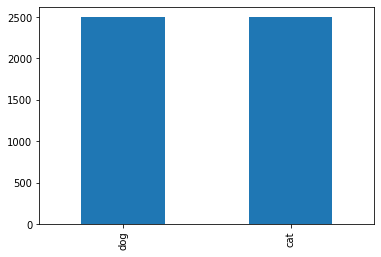

In [16]:
df_train = pd.DataFrame(y_train_img, columns=['category'])
df_train['category'].value_counts().plot.bar()

Como podemos ver tenemos 2500 ejemplos de cada clase... poquito para ser una red neuronal para vision por computador... ya vereis...

## 6. Pintemos una imagen

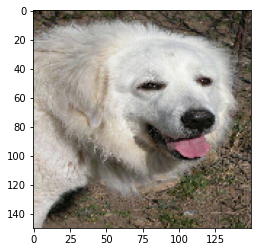

In [17]:
sample = random.choice(range(0,4999))
image = x_train_scaled[sample]
plt.imshow(image, cmap=plt.cm.binary)

## 7. Apilemos bloques para hacer el modelo

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

### 7.1 Montemos nuestro feature extractor don VGG16

In [18]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(ANCHO_IMAGEN, ALTURA_IMAGEN, CANALES_IMAGENES))

58892288/58889256 [==============================] - 1s 0us/step


In [19]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [20]:
output = vgg.layers[-1].output
new_output_layer = ks.layers.Flatten()(output)
vgg_model = Model(vgg.input, new_output_layer)

In [21]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [22]:
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Tipo capa', 'Nombre capa', 'Es entrenable?'])

,Tipo capa,Nombre capa,Es entrenable?
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc86641d650>,input_1,True
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc865f11d90>,block1_conv1,True
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8646c28d0>,block1_conv2,True
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc86461b050>,block1_pool,True
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc86464b650>,block2_conv1,True
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc864650ad0>,block2_conv2,True
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc8604c1c90>,block2_pool,True
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8604c6190>,block3_conv1,True
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8604c93d0>,block3_conv2,True
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8604d4490>,block3_conv3,True


In [23]:
vgg_model.trainable

True

Congelar capas para entrenamiento

In [24]:
vgg_model.trainable = False

for layer in vgg_model.layers:
  layer.trainable = False

In [25]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Tipo capa', 'Nombre capa', 'Es entrenable?'])

,Tipo capa,Nombre capa,Es entrenable?
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc86641d650>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc865f11d90>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8646c28d0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc86461b050>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc86464b650>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc864650ad0>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc8604c1c90>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8604c6190>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8604c93d0>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8604d4490>,block3_conv3,False


### 7.4 Pre-procesado de las imagenes para llevarlas al cuello de botella

In [26]:
def llevarCuelloBotella(model, input_imgs):
  return model.predict(input_imgs)

In [27]:
x_train_post_vgg16 = llevarCuelloBotella(vgg_model, x_train_scaled)
x_val_post_vgg16 = llevarCuelloBotella(vgg_model, x_val_scaled)
x_test_post_vgg16 = llevarCuelloBotella(vgg_model, x_test_scaled)


### 7.5 Montamos la red de classificación

In [28]:
input_shape = vgg_model.output_shape[1]
print(input_shape)

8192


In [29]:
model = ks.Sequential()

model.add(ks.layers.Dense(512, activation='relu', input_shape=(input_shape,)))
model.add(ks.layers.Dropout(0.3))
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.3))
model.add(ks.layers.Dense(1, activation='sigmoid')) # 1 de salida porque tenemos dos valores posibles 0 o 1 (tras aplicar un label encoder a dog y cat)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


## 8. Montemos el optimizador compilando el modelo


In [30]:
from tensorflow.keras.optimizers import Adam

In [31]:
new_adam = Adam(learning_rate=0.0005)

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

## 9. Definamos un callback para el Early Stopping

**Early Stopping**

Prevenimos el sobre ajuste parando cuando tras 10 epochs y el error de la validacion no decrementa (estamos en una plateau)

In [32]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

## 10. Preparamos los datos

Haremos un one-hote encoding que nos va a ir bien para nuestra clasificación

In [33]:
y_train_img

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train_img)
y_train_encoded = le.transform(y_train_img)
y_val_encoded = le.transform(y_val_img)
y_test_encoded = le.transform(y_test_img)

In [35]:
y_train_encoded

array([0, 0, 0, ..., 1, 1, 1])

## 11. Transformador de imagenes a datos consumibles por la red neuronal

**De entrenamiento**

Aquí incluiremos nuestra parte de generación de imagenes (con código de partida)

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow(
    x_train_img,  # Aquí hay que usar datos NO re-escalados... de ahi que no usemos x_train_rescaled!
    y_train_encoded, 
    batch_size=50
)

**De validacion (test no lo necesita)**

Fijaos que aquí la única modificación es un re-escalado, nada de modificaciones

In [37]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
    )
validation_generator = validation_datagen.flow(
    x_val_img, # Aquí hay que usar datos NO re-escalados... de ahi que no usemos x_val_rescaled!
    y_val_encoded, 
    batch_size=20
)


No tiene mala pinta!!

## 12. Veamos que pinta tiene el generador de datos

A rellenar para ver que nos da el generador de imagenes nuevas

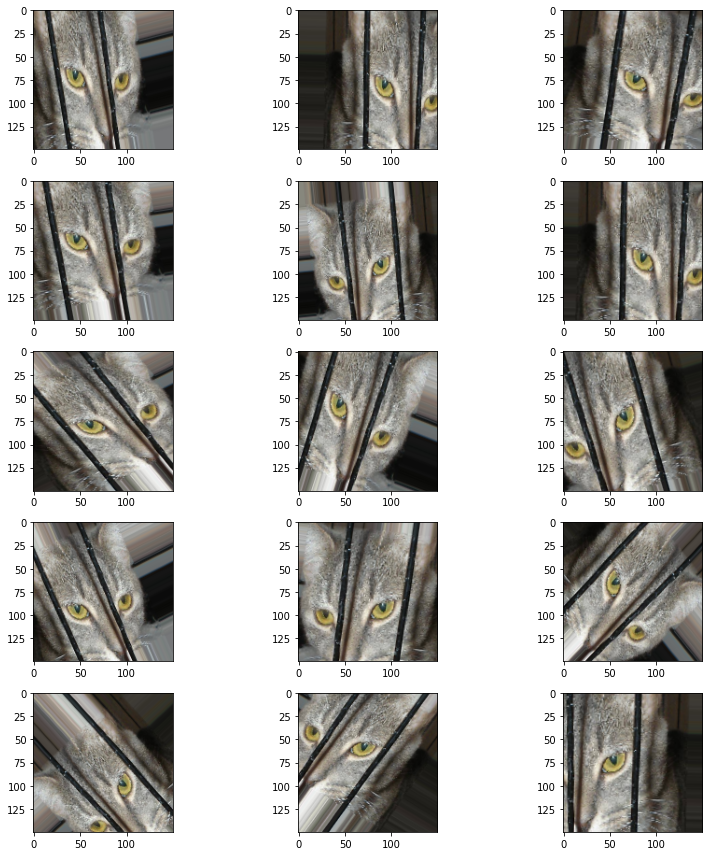

In [38]:
sample = random.choice(range(0,4999))

example_generator = train_datagen.flow(
    x_train_img[sample:sample+1],
    y_train_encoded[sample:sample+1],
    batch_size=1
)

plt.figure(figsize=(12, 12))
for i in range(0,15):
  plt.subplot(5, 3, i+1)
  for X,y in example_generator:
    image = X[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

## 13. Entrenemos el modelo!

In [39]:
epochs = 200

history = model.fit(x_train_post_vgg16, y_train_encoded, epochs=epochs, 
                    validation_data=(x_val_post_vgg16, y_val_encoded), batch_size=128, 
                    callbacks=[callback_val_loss, callback_val_accuracy])

"""history = model.fit(train_generator, epochs=epochs, 
                    validation_data=validation_generator,
                    steps_per_epoch= 100, validation_steps=50,
                    callbacks=[callback_val_loss, callback_val_accuracy])"""

Epoch 1/200
40/40 [==============================] - 1s 15ms/step - loss: 0.6478 - accuracy: 0.7408 - val_loss: 0.2526 - val_accuracy: 0.8950
Epoch 2/200
40/40 [==============================] - 0s 10ms/step - loss: 0.2621 - accuracy: 0.8878 - val_loss: 0.2449 - val_accuracy: 0.8840
Epoch 3/200
40/40 [==============================] - 0s 10ms/step - loss: 0.2157 - accuracy: 0.9070 - val_loss: 0.2202 - val_accuracy: 0.9040
Epoch 4/200
40/40 [==============================] - 0s 10ms/step - loss: 0.1767 - accuracy: 0.9336 - val_loss: 0.2247 - val_accuracy: 0.9040
Epoch 5/200
40/40 [==============================] - 0s 10ms/step - loss: 0.1309 - accuracy: 0.9468 - val_loss: 0.3365 - val_accuracy: 0.8690
Epoch 6/200
40/40 [==============================] - 0s 11ms/step - loss: 0.1588 - accuracy: 0.9328 - val_loss: 0.2322 - val_accuracy: 0.9120
Epoch 7/200
40/40 [==============================] - 0s 10ms/step - loss: 0.1146 - accuracy: 0.9540 - val_loss: 0.2800 - val_accuracy: 0.8840
Epoch 

'history = model.fit(train_generator, epochs=epochs, \n                    validation_data=validation_generator,\n                    steps_per_epoch= 100, validation_steps=50,\n                    callbacks=[callback_val_loss, callback_val_accuracy])'

## 14. Guardemos el modelo

In [ ]:
model.save(ruta+"model_basico.h5")

## 15. Veamos los resultados

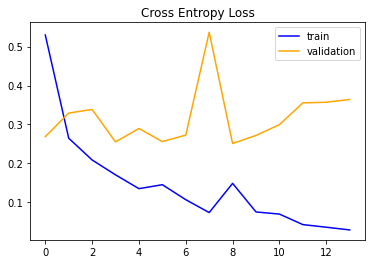

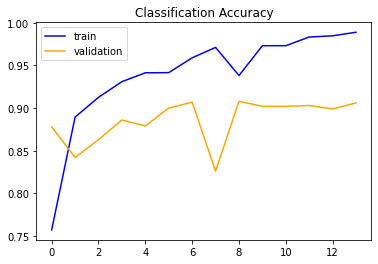

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()
plt.show()

In [ ]:
_, acc = model.evaluate(x_test_post_vgg16, y_test_encoded, verbose=0)
print('Test del Modelo sin Data Augmentation > %.3f' % (acc * 100.0))

Test del Modelo sin Data Augmentation > 89.900


## 16. Pintemos algunas predicciones

In [ ]:
predictions = model.predict(x_test_post_vgg16) 


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  if true_label == 1:
    true_label = 'dog'
  else:
    true_label = 'cat'

  if np.max(predictions_array) > 0.50:
    predicted_label = 'dog'
  else:
    predicted_label = 'cat'

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(1))
  plt.yticks([])

  if true_label == 1:
    true_label = 'dog'
  else:
    true_label = 'cat'

  if np.max(predictions_array) > 0.50:
    predicted_label = 'dog'
  else:
    predicted_label = 'cat'

  if predicted_label == true_label:
    color_plt = 'blue'
  else:
    color_plt = 'red'

  thisplot = plt.bar(range(1), np.max(predictions_array), color=color_plt)
  plt.ylim([0, 1])


Dibujamos los primeros digitos, con las predicciones y sus valores reales (un total de 20 imagenes, para no abusar de vuestros laptops)

Coloreamos las prediciones correctas en azul y los fallos en rojo

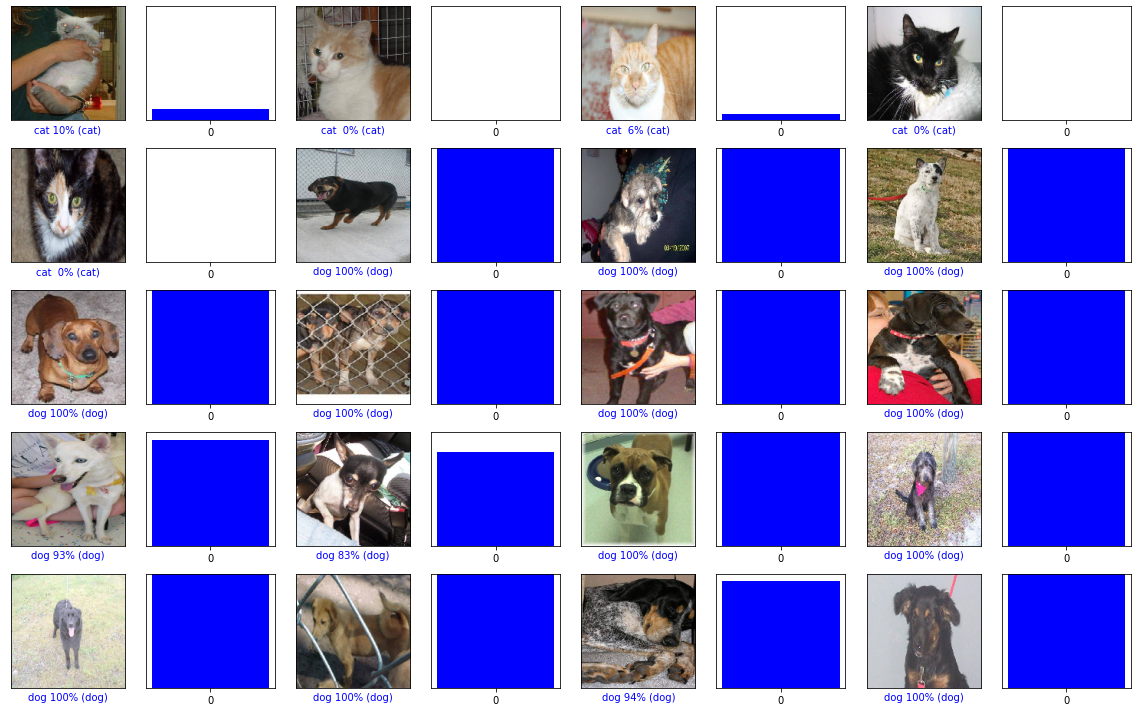

In [ ]:
num_rows = 5
num_cols = 4
start = 495
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test_encoded, x_test_scaled)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test_encoded)
plt.tight_layout()
plt.show()